In [386]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib as plt
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Loading the csv dataset 

In [387]:
df=pd.read_csv("Data_Gov_Tamil_Nadu.csv", encoding="ANSI",low_memory=False)

In [388]:
df.tail()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
150866,U74997TN2016PTC112556,QUAD42 MEDIA PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,19-09-2016,Tamil Nadu,1000000.0,100000.0,74997,Real estate renting and business activities,"Old No.37, New No.5753rd Street, 9th Avenue",ROC CHENNAI,ezhil@quad42.com,31-03-2019,31-03-2019
150867,U74997TN2018PTC121491,IYERAATHU FOODS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,100000.0,100000.0,74997,Real estate renting and business activities,"G-3, G-Block, AKS Garden,11/1, 2nd Street Rama...",ROC CHENNAI,sneha.creative@gmail.com,NaN,NaN
150868,U74997TZ2016PTC027802,POLYGAR FARM SOLUTIONS PRIVATE LIMITED,STOF,Private,Company limited by Shares,Non-govt company,20-07-2016,Tamil Nadu,100000.0,20000.0,74997,Real estate renting and business activities,"31, LIC Colony (VOC Colony),Kurichi,",ROC COIMBATORE,prashanthramana@gmail.com,NaN,NaN
150869,U74997TZ2018PTC030177,PANDIYA AGRI SOLUTIONS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,2500000.0,1500000.0,74997,Real estate renting and business activities,"10/10 C3, Venkatasamy StreetRailyway Mens Colo...",ROC COIMBATORE,sathishpandiya@gmail.com,31-03-2019,31-03-2019
150870,U74997TZ2019PTC032491,NROOT TECHNOLOGIES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,25-07-2019,Tamil Nadu,1500000.0,1100000.0,74997,Real estate renting and business activities,"139/1BPUDHUKOTTAI ROAD, MAPILLAI NAYAKKANPATTI",ROC COIMBATORE,nroottechnologies@gmail.com,NaN,NaN


In [389]:
df.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER               0
COMPANY_NAME                                  0
COMPANY_STATUS                                0
COMPANY_CLASS                               334
COMPANY_CATEGORY                            334
COMPANY_SUB_CATEGORY                        334
DATE_OF_REGISTRATION                         39
REGISTERED_STATE                              0
AUTHORIZED_CAP                                0
PAIDUP_CAPITAL                                0
INDUSTRIAL_CLASS                            310
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        0
REGISTERED_OFFICE_ADDRESS                    90
REGISTRAR_OF_COMPANIES                      174
EMAIL_ADDR                                38129
LATEST_YEAR_ANNUAL_RETURN                 75889
LATEST_YEAR_FINANCIAL_STATEMENT           75782
dtype: int64

# Handling null values  

In [390]:
missing_value = ["N/a","na",np.nan]
df=pd.read_csv("Data_Gov_Tamil_Nadu.csv", encoding="ANSI",low_memory=False, na_values=missing_value)

In [391]:
df.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER               0
COMPANY_NAME                                  0
COMPANY_STATUS                                0
COMPANY_CLASS                               334
COMPANY_CATEGORY                            334
COMPANY_SUB_CATEGORY                        334
DATE_OF_REGISTRATION                         39
REGISTERED_STATE                              0
AUTHORIZED_CAP                                0
PAIDUP_CAPITAL                                0
INDUSTRIAL_CLASS                            310
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        0
REGISTERED_OFFICE_ADDRESS                    90
REGISTRAR_OF_COMPANIES                      174
EMAIL_ADDR                                38129
LATEST_YEAR_ANNUAL_RETURN                 75889
LATEST_YEAR_FINANCIAL_STATEMENT           75782
dtype: int64

<Axes: >

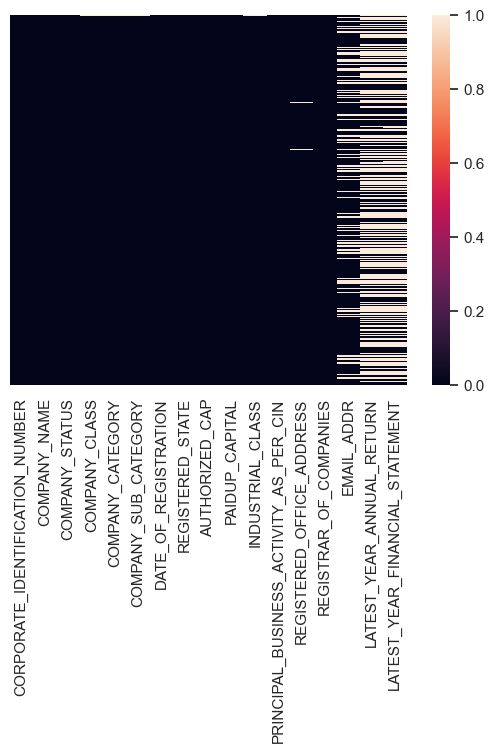

In [392]:
sns.heatmap(df.isnull(), yticklabels=False)

In [393]:
df_dropped = df.dropna(how="all")

In [394]:
df_dropped.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F00643,"HOCHTIEFF AG,",NAEF,NaN,NaN,NaN,01-12-1961,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,"AMBLE SIDE, NO.8(OLD NO.30),3RD FLOOR KHADER N...",ROC DELHI,NaN,NaN,NaN
1,F00721,SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...,ACTV,NaN,NaN,NaN,NaN,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,"FLAT NO. 6, 1st FLOOR, 113/113ARAMA NAICKEN ST...",ROC DELHI,shuchi.chug@asa.in,NaN,NaN
2,F00892,SRILANKAN AIRLINES LIMITED,ACTV,NaN,NaN,NaN,01-03-1982,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,"SRILANKAN AIRLINES LIMITED, VIJAYA TOWERSNO-4,...",ROC DELHI,shree16us@yahoo.com,NaN,NaN
3,F01208,CALTEX INDIA LIMITED,NAEF,NaN,NaN,NaN,NaN,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,GOLD CREST 24 55 NORTHUSMAN ROAD T NAGAR,ROC DELHI,NaN,NaN,NaN
4,F01218,GE HEALTHCARE BIO-SCIENCES LIMITED,ACTV,NaN,NaN,NaN,NaN,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,FF-3 Palani Centre32 Venkat Naryan Road Nagar,ROC DELHI,karthick9999@yahoo.com,NaN,NaN


# Dropping Duplicate values 

In [395]:
df_dupfree = df.drop_duplicates(["CORPORATE_IDENTIFICATION_NUMBER","COMPANY_NAME","COMPANY_STATUS","COMPANY_CLASS","COMPANY_CATEGORY","COMPANY_SUB_CATEGORY","DATE_OF_REGISTRATION","REGISTERED_STATE","AUTHORIZED_CAP","PAIDUP_CAPITAL","INDUSTRIAL_CLASS","PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN","REGISTERED_OFFICE_ADDRESS","REGISTRAR_OF_COMPANIES","EMAIL_ADDR","LATEST_YEAR_ANNUAL_RETURN","LATEST_YEAR_FINANCIAL_STATEMENT"])

In [396]:
df_dupfree.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F00643,"HOCHTIEFF AG,",NAEF,NaN,NaN,NaN,01-12-1961,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,"AMBLE SIDE, NO.8(OLD NO.30),3RD FLOOR KHADER N...",ROC DELHI,NaN,NaN,NaN
1,F00721,SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...,ACTV,NaN,NaN,NaN,NaN,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,"FLAT NO. 6, 1st FLOOR, 113/113ARAMA NAICKEN ST...",ROC DELHI,shuchi.chug@asa.in,NaN,NaN
2,F00892,SRILANKAN AIRLINES LIMITED,ACTV,NaN,NaN,NaN,01-03-1982,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,"SRILANKAN AIRLINES LIMITED, VIJAYA TOWERSNO-4,...",ROC DELHI,shree16us@yahoo.com,NaN,NaN
3,F01208,CALTEX INDIA LIMITED,NAEF,NaN,NaN,NaN,NaN,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,GOLD CREST 24 55 NORTHUSMAN ROAD T NAGAR,ROC DELHI,NaN,NaN,NaN
4,F01218,GE HEALTHCARE BIO-SCIENCES LIMITED,ACTV,NaN,NaN,NaN,NaN,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,FF-3 Palani Centre32 Venkat Naryan Road Nagar,ROC DELHI,karthick9999@yahoo.com,NaN,NaN


# Handling Missing Data

## For categorical columns

In [397]:
df_dupfree['COMPANY_CLASS'].fillna(df_dupfree['COMPANY_CLASS'].mode()[0], inplace=True)
df_dupfree['COMPANY_CATEGORY'].fillna(df_dupfree['COMPANY_CATEGORY'].mode()[0], inplace=True)
df_dupfree['COMPANY_SUB_CATEGORY'].fillna(df_dupfree['COMPANY_SUB_CATEGORY'].mode()[0], inplace=True)

In [398]:
df_dupfree.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F00643,"HOCHTIEFF AG,",NAEF,Private,Company limited by Shares,Non-govt company,01-12-1961,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,"AMBLE SIDE, NO.8(OLD NO.30),3RD FLOOR KHADER N...",ROC DELHI,NaN,NaN,NaN
1,F00721,SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...,ACTV,Private,Company limited by Shares,Non-govt company,NaN,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,"FLAT NO. 6, 1st FLOOR, 113/113ARAMA NAICKEN ST...",ROC DELHI,shuchi.chug@asa.in,NaN,NaN
2,F00892,SRILANKAN AIRLINES LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,01-03-1982,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,"SRILANKAN AIRLINES LIMITED, VIJAYA TOWERSNO-4,...",ROC DELHI,shree16us@yahoo.com,NaN,NaN
3,F01208,CALTEX INDIA LIMITED,NAEF,Private,Company limited by Shares,Non-govt company,NaN,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,GOLD CREST 24 55 NORTHUSMAN ROAD T NAGAR,ROC DELHI,NaN,NaN,NaN
4,F01218,GE HEALTHCARE BIO-SCIENCES LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,NaN,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,FF-3 Palani Centre32 Venkat Naryan Road Nagar,ROC DELHI,karthick9999@yahoo.com,NaN,NaN


## Handling missing values in Date_Of_Registration 

In [399]:
mode_registration_date = df['DATE_OF_REGISTRATION'].mode()[0]
df_dupfree['DATE_OF_REGISTRATION'].fillna(mode_registration_date, inplace=True)

In [400]:
df_dupfree.tail()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
150866,U74997TN2016PTC112556,QUAD42 MEDIA PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,19-09-2016,Tamil Nadu,1000000.0,100000.0,74997,Real estate renting and business activities,"Old No.37, New No.5753rd Street, 9th Avenue",ROC CHENNAI,ezhil@quad42.com,31-03-2019,31-03-2019
150867,U74997TN2018PTC121491,IYERAATHU FOODS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,100000.0,100000.0,74997,Real estate renting and business activities,"G-3, G-Block, AKS Garden,11/1, 2nd Street Rama...",ROC CHENNAI,sneha.creative@gmail.com,NaN,NaN
150868,U74997TZ2016PTC027802,POLYGAR FARM SOLUTIONS PRIVATE LIMITED,STOF,Private,Company limited by Shares,Non-govt company,20-07-2016,Tamil Nadu,100000.0,20000.0,74997,Real estate renting and business activities,"31, LIC Colony (VOC Colony),Kurichi,",ROC COIMBATORE,prashanthramana@gmail.com,NaN,NaN
150869,U74997TZ2018PTC030177,PANDIYA AGRI SOLUTIONS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,2500000.0,1500000.0,74997,Real estate renting and business activities,"10/10 C3, Venkatasamy StreetRailyway Mens Colo...",ROC COIMBATORE,sathishpandiya@gmail.com,31-03-2019,31-03-2019
150870,U74997TZ2019PTC032491,NROOT TECHNOLOGIES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,25-07-2019,Tamil Nadu,1500000.0,1100000.0,74997,Real estate renting and business activities,"139/1BPUDHUKOTTAI ROAD, MAPILLAI NAYAKKANPATTI",ROC COIMBATORE,nroottechnologies@gmail.com,NaN,NaN


## Handling missing values in Industrial_Class

In [401]:
mode_industrial_class = df['INDUSTRIAL_CLASS'].mode()[0]
df_dupfree['INDUSTRIAL_CLASS'].fillna(mode_industrial_class, inplace=True)

In [402]:
df_dupfree.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F00643,"HOCHTIEFF AG,",NAEF,Private,Company limited by Shares,Non-govt company,01-12-1961,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,"AMBLE SIDE, NO.8(OLD NO.30),3RD FLOOR KHADER N...",ROC DELHI,NaN,NaN,NaN
1,F00721,SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...,ACTV,Private,Company limited by Shares,Non-govt company,01-04-1956,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,"FLAT NO. 6, 1st FLOOR, 113/113ARAMA NAICKEN ST...",ROC DELHI,shuchi.chug@asa.in,NaN,NaN
2,F00892,SRILANKAN AIRLINES LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,01-03-1982,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,"SRILANKAN AIRLINES LIMITED, VIJAYA TOWERSNO-4,...",ROC DELHI,shree16us@yahoo.com,NaN,NaN
3,F01208,CALTEX INDIA LIMITED,NAEF,Private,Company limited by Shares,Non-govt company,01-04-1956,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,GOLD CREST 24 55 NORTHUSMAN ROAD T NAGAR,ROC DELHI,NaN,NaN,NaN
4,F01218,GE HEALTHCARE BIO-SCIENCES LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,01-04-1956,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,FF-3 Palani Centre32 Venkat Naryan Road Nagar,ROC DELHI,karthick9999@yahoo.com,NaN,NaN


## Fill missing values in the REGISTERED_OFFICE_ADDRESS and REGISTRAR_OF_COMPANIES column with "UNKNOWN"

In [403]:
df_dupfree['REGISTERED_OFFICE_ADDRESS'].fillna("UNKNOWN", inplace=True)
df_dupfree['REGISTRAR_OF_COMPANIES'].fillna("UNKNOWN", inplace=True)

In [404]:
df_dupfree.tail()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
150866,U74997TN2016PTC112556,QUAD42 MEDIA PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,19-09-2016,Tamil Nadu,1000000.0,100000.0,74997,Real estate renting and business activities,"Old No.37, New No.5753rd Street, 9th Avenue",ROC CHENNAI,ezhil@quad42.com,31-03-2019,31-03-2019
150867,U74997TN2018PTC121491,IYERAATHU FOODS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,100000.0,100000.0,74997,Real estate renting and business activities,"G-3, G-Block, AKS Garden,11/1, 2nd Street Rama...",ROC CHENNAI,sneha.creative@gmail.com,NaN,NaN
150868,U74997TZ2016PTC027802,POLYGAR FARM SOLUTIONS PRIVATE LIMITED,STOF,Private,Company limited by Shares,Non-govt company,20-07-2016,Tamil Nadu,100000.0,20000.0,74997,Real estate renting and business activities,"31, LIC Colony (VOC Colony),Kurichi,",ROC COIMBATORE,prashanthramana@gmail.com,NaN,NaN
150869,U74997TZ2018PTC030177,PANDIYA AGRI SOLUTIONS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,2500000.0,1500000.0,74997,Real estate renting and business activities,"10/10 C3, Venkatasamy StreetRailyway Mens Colo...",ROC COIMBATORE,sathishpandiya@gmail.com,31-03-2019,31-03-2019
150870,U74997TZ2019PTC032491,NROOT TECHNOLOGIES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,25-07-2019,Tamil Nadu,1500000.0,1100000.0,74997,Real estate renting and business activities,"139/1BPUDHUKOTTAI ROAD, MAPILLAI NAYAKKANPATTI",ROC COIMBATORE,nroottechnologies@gmail.com,NaN,NaN


In [405]:
df_dupfree.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER               0
COMPANY_NAME                                  0
COMPANY_STATUS                                0
COMPANY_CLASS                                 0
COMPANY_CATEGORY                              0
COMPANY_SUB_CATEGORY                          0
DATE_OF_REGISTRATION                          0
REGISTERED_STATE                              0
AUTHORIZED_CAP                                0
PAIDUP_CAPITAL                                0
INDUSTRIAL_CLASS                              0
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        0
REGISTERED_OFFICE_ADDRESS                     0
REGISTRAR_OF_COMPANIES                        0
EMAIL_ADDR                                38129
LATEST_YEAR_ANNUAL_RETURN                 75889
LATEST_YEAR_FINANCIAL_STATEMENT           75782
dtype: int64

## Dropping irrelevant data

In [406]:
df_dupfree.drop('EMAIL_ADDR', axis=1, inplace=True)

In [407]:
df_dupfree.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F00643,"HOCHTIEFF AG,",NAEF,Private,Company limited by Shares,Non-govt company,01-12-1961,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,"AMBLE SIDE, NO.8(OLD NO.30),3RD FLOOR KHADER N...",ROC DELHI,NaN,NaN
1,F00721,SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...,ACTV,Private,Company limited by Shares,Non-govt company,01-04-1956,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,"FLAT NO. 6, 1st FLOOR, 113/113ARAMA NAICKEN ST...",ROC DELHI,NaN,NaN
2,F00892,SRILANKAN AIRLINES LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,01-03-1982,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,"SRILANKAN AIRLINES LIMITED, VIJAYA TOWERSNO-4,...",ROC DELHI,NaN,NaN
3,F01208,CALTEX INDIA LIMITED,NAEF,Private,Company limited by Shares,Non-govt company,01-04-1956,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,GOLD CREST 24 55 NORTHUSMAN ROAD T NAGAR,ROC DELHI,NaN,NaN
4,F01218,GE HEALTHCARE BIO-SCIENCES LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,01-04-1956,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,FF-3 Palani Centre32 Venkat Naryan Road Nagar,ROC DELHI,NaN,NaN


In [408]:
df_dupfree.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER               0
COMPANY_NAME                                  0
COMPANY_STATUS                                0
COMPANY_CLASS                                 0
COMPANY_CATEGORY                              0
COMPANY_SUB_CATEGORY                          0
DATE_OF_REGISTRATION                          0
REGISTERED_STATE                              0
AUTHORIZED_CAP                                0
PAIDUP_CAPITAL                                0
INDUSTRIAL_CLASS                              0
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        0
REGISTERED_OFFICE_ADDRESS                     0
REGISTRAR_OF_COMPANIES                        0
LATEST_YEAR_ANNUAL_RETURN                 75889
LATEST_YEAR_FINANCIAL_STATEMENT           75782
dtype: int64

## Fill missing values in the LATEST_YEAR_ANNUAL_RETURN and LATEST_YEAR_FINANCIAL_STATEMENT column with "UNKNOWN"

In [409]:
df_dupfree['LATEST_YEAR_ANNUAL_RETURN'].fillna("UNKNOWN", inplace=True)
df_dupfree['LATEST_YEAR_FINANCIAL_STATEMENT'].fillna("UNKNOWN", inplace=True)

In [410]:
df_dupfree.tail()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
150866,U74997TN2016PTC112556,QUAD42 MEDIA PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,19-09-2016,Tamil Nadu,1000000.0,100000.0,74997,Real estate renting and business activities,"Old No.37, New No.5753rd Street, 9th Avenue",ROC CHENNAI,31-03-2019,31-03-2019
150867,U74997TN2018PTC121491,IYERAATHU FOODS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,100000.0,100000.0,74997,Real estate renting and business activities,"G-3, G-Block, AKS Garden,11/1, 2nd Street Rama...",ROC CHENNAI,UNKNOWN,UNKNOWN
150868,U74997TZ2016PTC027802,POLYGAR FARM SOLUTIONS PRIVATE LIMITED,STOF,Private,Company limited by Shares,Non-govt company,20-07-2016,Tamil Nadu,100000.0,20000.0,74997,Real estate renting and business activities,"31, LIC Colony (VOC Colony),Kurichi,",ROC COIMBATORE,UNKNOWN,UNKNOWN
150869,U74997TZ2018PTC030177,PANDIYA AGRI SOLUTIONS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,2500000.0,1500000.0,74997,Real estate renting and business activities,"10/10 C3, Venkatasamy StreetRailyway Mens Colo...",ROC COIMBATORE,31-03-2019,31-03-2019
150870,U74997TZ2019PTC032491,NROOT TECHNOLOGIES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,25-07-2019,Tamil Nadu,1500000.0,1100000.0,74997,Real estate renting and business activities,"139/1BPUDHUKOTTAI ROAD, MAPILLAI NAYAKKANPATTI",ROC COIMBATORE,UNKNOWN,UNKNOWN


# Get an overview of the data

In [411]:
print(df_dupfree.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150871 entries, 0 to 150870
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   CORPORATE_IDENTIFICATION_NUMBER         150871 non-null  object 
 1   COMPANY_NAME                            150871 non-null  object 
 2   COMPANY_STATUS                          150871 non-null  object 
 3   COMPANY_CLASS                           150871 non-null  object 
 4   COMPANY_CATEGORY                        150871 non-null  object 
 5   COMPANY_SUB_CATEGORY                    150871 non-null  object 
 6   DATE_OF_REGISTRATION                    150871 non-null  object 
 7   REGISTERED_STATE                        150871 non-null  object 
 8   AUTHORIZED_CAP                          150871 non-null  float64
 9   PAIDUP_CAPITAL                          150871 non-null  float64
 10  INDUSTRIAL_CLASS                        1508

# Summary statistics

In [412]:
print(df_dupfree.describe())

       AUTHORIZED_CAP  PAIDUP_CAPITAL
count    1.508710e+05    1.508710e+05
mean     3.522781e+07    2.328824e+07
std      1.408554e+09    1.072458e+09
min      0.000000e+00    0.000000e+00
25%      1.000000e+05    1.000000e+05
50%      8.000000e+05    1.000000e+05
75%      2.000000e+06    6.857450e+05
max      3.000000e+11    2.461235e+11


In [413]:
df_dupfree.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F00643,"HOCHTIEFF AG,",NAEF,Private,Company limited by Shares,Non-govt company,01-12-1961,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,"AMBLE SIDE, NO.8(OLD NO.30),3RD FLOOR KHADER N...",ROC DELHI,UNKNOWN,UNKNOWN
1,F00721,SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...,ACTV,Private,Company limited by Shares,Non-govt company,01-04-1956,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,"FLAT NO. 6, 1st FLOOR, 113/113ARAMA NAICKEN ST...",ROC DELHI,UNKNOWN,UNKNOWN
2,F00892,SRILANKAN AIRLINES LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,01-03-1982,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,"SRILANKAN AIRLINES LIMITED, VIJAYA TOWERSNO-4,...",ROC DELHI,UNKNOWN,UNKNOWN
3,F01208,CALTEX INDIA LIMITED,NAEF,Private,Company limited by Shares,Non-govt company,01-04-1956,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,GOLD CREST 24 55 NORTHUSMAN ROAD T NAGAR,ROC DELHI,UNKNOWN,UNKNOWN
4,F01218,GE HEALTHCARE BIO-SCIENCES LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,01-04-1956,Tamil Nadu,0.0,0.0,74999,Agriculture & allied,FF-3 Palani Centre32 Venkat Naryan Road Nagar,ROC DELHI,UNKNOWN,UNKNOWN


In [414]:
df_dupfree.tail()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
150866,U74997TN2016PTC112556,QUAD42 MEDIA PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,19-09-2016,Tamil Nadu,1000000.0,100000.0,74997,Real estate renting and business activities,"Old No.37, New No.5753rd Street, 9th Avenue",ROC CHENNAI,31-03-2019,31-03-2019
150867,U74997TN2018PTC121491,IYERAATHU FOODS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,100000.0,100000.0,74997,Real estate renting and business activities,"G-3, G-Block, AKS Garden,11/1, 2nd Street Rama...",ROC CHENNAI,UNKNOWN,UNKNOWN
150868,U74997TZ2016PTC027802,POLYGAR FARM SOLUTIONS PRIVATE LIMITED,STOF,Private,Company limited by Shares,Non-govt company,20-07-2016,Tamil Nadu,100000.0,20000.0,74997,Real estate renting and business activities,"31, LIC Colony (VOC Colony),Kurichi,",ROC COIMBATORE,UNKNOWN,UNKNOWN
150869,U74997TZ2018PTC030177,PANDIYA AGRI SOLUTIONS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,2500000.0,1500000.0,74997,Real estate renting and business activities,"10/10 C3, Venkatasamy StreetRailyway Mens Colo...",ROC COIMBATORE,31-03-2019,31-03-2019
150870,U74997TZ2019PTC032491,NROOT TECHNOLOGIES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,25-07-2019,Tamil Nadu,1500000.0,1100000.0,74997,Real estate renting and business activities,"139/1BPUDHUKOTTAI ROAD, MAPILLAI NAYAKKANPATTI",ROC COIMBATORE,UNKNOWN,UNKNOWN


In [415]:
df_dupfree.dtypes

CORPORATE_IDENTIFICATION_NUMBER            object
COMPANY_NAME                               object
COMPANY_STATUS                             object
COMPANY_CLASS                              object
COMPANY_CATEGORY                           object
COMPANY_SUB_CATEGORY                       object
DATE_OF_REGISTRATION                       object
REGISTERED_STATE                           object
AUTHORIZED_CAP                            float64
PAIDUP_CAPITAL                            float64
INDUSTRIAL_CLASS                           object
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN     object
REGISTERED_OFFICE_ADDRESS                  object
REGISTRAR_OF_COMPANIES                     object
LATEST_YEAR_ANNUAL_RETURN                  object
LATEST_YEAR_FINANCIAL_STATEMENT            object
dtype: object

In [416]:
correlation = df_dupfree[["AUTHORIZED_CAP","PAIDUP_CAPITAL"]].corr()

<Axes: >

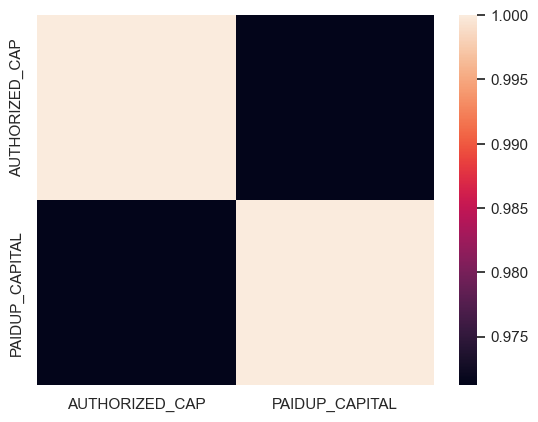

In [417]:
sns.heatmap(correlation)

#  Exploratory Data Analysis (EDA)

## Distribution of company registrations by industry, location, and size

In [418]:
data = {
    'COMPANY_NAME': df_dupfree["COMPANY_NAME"].head(150870),
    'AUTHORIZED_CAP': df_dupfree["AUTHORIZED_CAP"].head(150870),
    'PAIDUP_CAPITAL': df_dupfree["PAIDUP_CAPITAL"].head(150870)
}

df_company_size = pd.DataFrame(data)

size_categories = {
    'Small': {'authorized_cap': 1000000, 'paidup_capital': 100000},
    'Medium': {'authorized_cap': 50000000, 'paidup_capital': 1000000},
}
conditions = [
    (df_company_size['AUTHORIZED_CAP'] < size_categories['Small']['authorized_cap']) & (df_company_size['PAIDUP_CAPITAL'] < size_categories['Small']['paidup_capital']),
    (df_company_size['AUTHORIZED_CAP'] < size_categories['Medium']['authorized_cap']) & (df_company_size['PAIDUP_CAPITAL'] < size_categories['Medium']['paidup_capital'])
]
choices = ['Small', 'Medium']

df_company_size['COMPANY_SIZE'] = np.select(conditions, choices, default='Large')
df_dupfree['COMPANY_SIZE'] = df_company_size['COMPANY_SIZE']

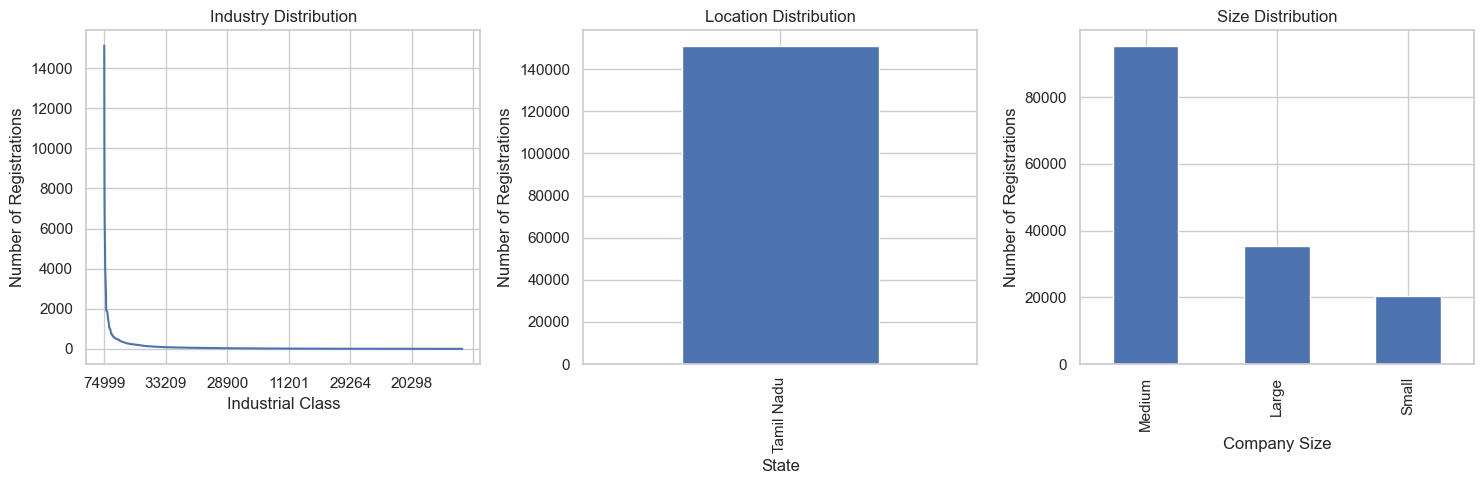

In [419]:
industry_distribution = df_dupfree['INDUSTRIAL_CLASS'].value_counts()
location_distribution = df_dupfree['REGISTERED_STATE'].value_counts()
size_distribution = df_dupfree['COMPANY_SIZE'].value_counts()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
industry_distribution.plot(kind='line', ax=axes[0])
axes[0].set_title('Industry Distribution')
axes[0].set_xlabel('Industrial Class')
axes[0].set_ylabel('Number of Registrations')

location_distribution.plot(kind='bar', ax=axes[1])
axes[1].set_title('Location Distribution')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Number of Registrations')

size_distribution.plot(kind='bar', ax=axes[2])
axes[2].set_title('Size Distribution')
axes[2].set_xlabel('Company Size')
axes[2].set_ylabel('Number of Registrations')

plt.tight_layout()
plt.show()

## Company registrations changed over time

In [420]:
df_dupfree['REGISTRATION_YEAR'] = pd.to_datetime(df_dupfree['DATE_OF_REGISTRATION'], format='%d-%m-%Y').dt.strftime('%Y')

In [421]:
df_dupfree.tail()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT,COMPANY_SIZE,REGISTRATION_YEAR
150866,U74997TN2016PTC112556,QUAD42 MEDIA PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,19-09-2016,Tamil Nadu,1000000.0,100000.0,74997,Real estate renting and business activities,"Old No.37, New No.5753rd Street, 9th Avenue",ROC CHENNAI,31-03-2019,31-03-2019,Medium,2016
150867,U74997TN2018PTC121491,IYERAATHU FOODS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,100000.0,100000.0,74997,Real estate renting and business activities,"G-3, G-Block, AKS Garden,11/1, 2nd Street Rama...",ROC CHENNAI,UNKNOWN,UNKNOWN,Medium,2018
150868,U74997TZ2016PTC027802,POLYGAR FARM SOLUTIONS PRIVATE LIMITED,STOF,Private,Company limited by Shares,Non-govt company,20-07-2016,Tamil Nadu,100000.0,20000.0,74997,Real estate renting and business activities,"31, LIC Colony (VOC Colony),Kurichi,",ROC COIMBATORE,UNKNOWN,UNKNOWN,Small,2016
150869,U74997TZ2018PTC030177,PANDIYA AGRI SOLUTIONS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,2500000.0,1500000.0,74997,Real estate renting and business activities,"10/10 C3, Venkatasamy StreetRailyway Mens Colo...",ROC COIMBATORE,31-03-2019,31-03-2019,Large,2018
150870,U74997TZ2019PTC032491,NROOT TECHNOLOGIES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,25-07-2019,Tamil Nadu,1500000.0,1100000.0,74997,Real estate renting and business activities,"139/1BPUDHUKOTTAI ROAD, MAPILLAI NAYAKKANPATTI",ROC COIMBATORE,UNKNOWN,UNKNOWN,NaN,2019


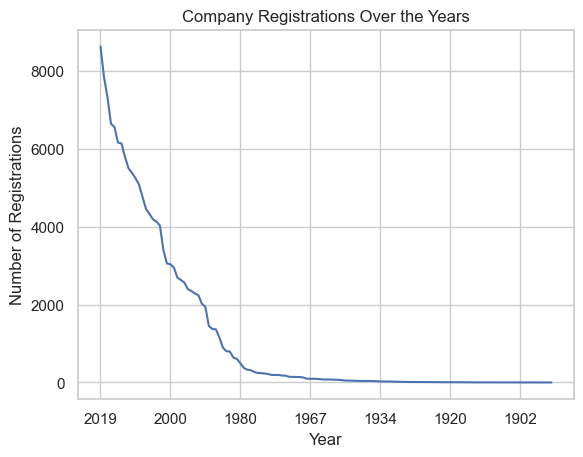

In [422]:
yearly_counts = df_dupfree["REGISTRATION_YEAR"].value_counts()
yearly_counts.plot(kind="line")
plt.xlabel("Year")
plt.ylabel("Number of Registrations")
plt.title("Company Registrations Over the Years")
plt.show()

## Relationships between different variables, such as company size, authorized capital, and paid-up

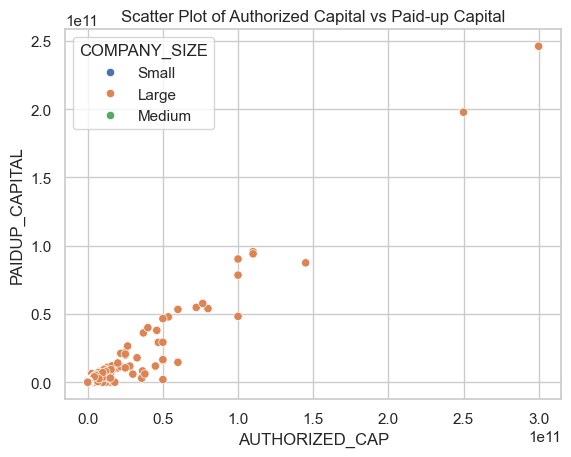

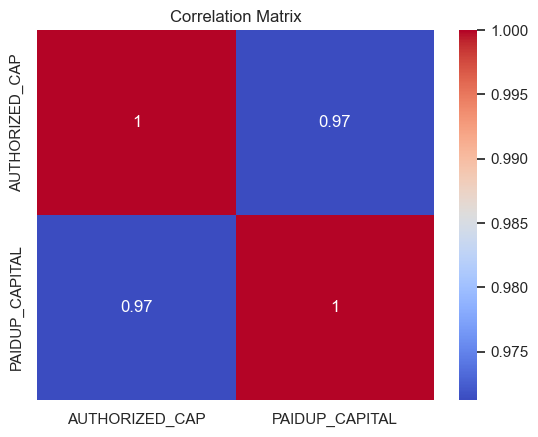

In [423]:
sns.scatterplot(data=df_company_size, x='AUTHORIZED_CAP', y='PAIDUP_CAPITAL', hue='COMPANY_SIZE')
plt.title("Scatter Plot of Authorized Capital vs Paid-up Capital")
plt.show()
correlation_matrix = df_company_size[['AUTHORIZED_CAP', 'PAIDUP_CAPITAL']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Feature Engineering

## Age of the Company

In [424]:
current_year = datetime.datetime.now().year
df_dupfree['COMPANY_AGE'] = current_year - df_dupfree['REGISTRATION_YEAR'].astype(int)
df_dupfree['COMPANY_AGE'] = df_dupfree['COMPANY_AGE'].astype(int)

In [425]:
df_dupfree.tail()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT,COMPANY_SIZE,REGISTRATION_YEAR,COMPANY_AGE
150866,U74997TN2016PTC112556,QUAD42 MEDIA PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,19-09-2016,Tamil Nadu,1000000.0,100000.0,74997,Real estate renting and business activities,"Old No.37, New No.5753rd Street, 9th Avenue",ROC CHENNAI,31-03-2019,31-03-2019,Medium,2016,7
150867,U74997TN2018PTC121491,IYERAATHU FOODS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,100000.0,100000.0,74997,Real estate renting and business activities,"G-3, G-Block, AKS Garden,11/1, 2nd Street Rama...",ROC CHENNAI,UNKNOWN,UNKNOWN,Medium,2018,5
150868,U74997TZ2016PTC027802,POLYGAR FARM SOLUTIONS PRIVATE LIMITED,STOF,Private,Company limited by Shares,Non-govt company,20-07-2016,Tamil Nadu,100000.0,20000.0,74997,Real estate renting and business activities,"31, LIC Colony (VOC Colony),Kurichi,",ROC COIMBATORE,UNKNOWN,UNKNOWN,Small,2016,7
150869,U74997TZ2018PTC030177,PANDIYA AGRI SOLUTIONS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,2500000.0,1500000.0,74997,Real estate renting and business activities,"10/10 C3, Venkatasamy StreetRailyway Mens Colo...",ROC COIMBATORE,31-03-2019,31-03-2019,Large,2018,5
150870,U74997TZ2019PTC032491,NROOT TECHNOLOGIES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,25-07-2019,Tamil Nadu,1500000.0,1100000.0,74997,Real estate renting and business activities,"139/1BPUDHUKOTTAI ROAD, MAPILLAI NAYAKKANPATTI",ROC COIMBATORE,UNKNOWN,UNKNOWN,NaN,2019,4


In [426]:
df_dupfree.dtypes

CORPORATE_IDENTIFICATION_NUMBER            object
COMPANY_NAME                               object
COMPANY_STATUS                             object
COMPANY_CLASS                              object
COMPANY_CATEGORY                           object
COMPANY_SUB_CATEGORY                       object
DATE_OF_REGISTRATION                       object
REGISTERED_STATE                           object
AUTHORIZED_CAP                            float64
PAIDUP_CAPITAL                            float64
INDUSTRIAL_CLASS                           object
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN     object
REGISTERED_OFFICE_ADDRESS                  object
REGISTRAR_OF_COMPANIES                     object
LATEST_YEAR_ANNUAL_RETURN                  object
LATEST_YEAR_FINANCIAL_STATEMENT            object
COMPANY_SIZE                               object
REGISTRATION_YEAR                          object
COMPANY_AGE                                 int32
dtype: object

## Label Encoding for 'COMPANY_STATUS'

In [427]:
label_encoder = LabelEncoder()
df_dupfree['COMPANY_STATUS_CODE'] = label_encoder.fit_transform(df_dupfree['COMPANY_STATUS'])

In [428]:
df_dupfree.tail()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT,COMPANY_SIZE,REGISTRATION_YEAR,COMPANY_AGE,COMPANY_STATUS_CODE
150866,U74997TN2016PTC112556,QUAD42 MEDIA PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,19-09-2016,Tamil Nadu,1000000.0,100000.0,74997,Real estate renting and business activities,"Old No.37, New No.5753rd Street, 9th Avenue",ROC CHENNAI,31-03-2019,31-03-2019,Medium,2016,7,0
150867,U74997TN2018PTC121491,IYERAATHU FOODS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,100000.0,100000.0,74997,Real estate renting and business activities,"G-3, G-Block, AKS Garden,11/1, 2nd Street Rama...",ROC CHENNAI,UNKNOWN,UNKNOWN,Medium,2018,5,0
150868,U74997TZ2016PTC027802,POLYGAR FARM SOLUTIONS PRIVATE LIMITED,STOF,Private,Company limited by Shares,Non-govt company,20-07-2016,Tamil Nadu,100000.0,20000.0,74997,Real estate renting and business activities,"31, LIC Colony (VOC Colony),Kurichi,",ROC COIMBATORE,UNKNOWN,UNKNOWN,Small,2016,7,8
150869,U74997TZ2018PTC030177,PANDIYA AGRI SOLUTIONS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,2500000.0,1500000.0,74997,Real estate renting and business activities,"10/10 C3, Venkatasamy StreetRailyway Mens Colo...",ROC COIMBATORE,31-03-2019,31-03-2019,Large,2018,5,0
150870,U74997TZ2019PTC032491,NROOT TECHNOLOGIES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,25-07-2019,Tamil Nadu,1500000.0,1100000.0,74997,Real estate renting and business activities,"139/1BPUDHUKOTTAI ROAD, MAPILLAI NAYAKKANPATTI",ROC COIMBATORE,UNKNOWN,UNKNOWN,NaN,2019,4,0


## Number of Employees

In [429]:
size_categories = {
    'Small': 10,   
    'Medium': 50,    
    'Large': 100,    
}
df_dupfree['EMPLOYEES'] =  df_dupfree['COMPANY_SIZE'].map(size_categories)

In [430]:
mode_registration_date = df_dupfree['EMPLOYEES'].mode()[0]
df_dupfree['EMPLOYEES'].fillna(mode_registration_date, inplace=True)

In [431]:
df_dupfree.tail()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,...,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT,COMPANY_SIZE,REGISTRATION_YEAR,COMPANY_AGE,COMPANY_STATUS_CODE,EMPLOYEES
150866,U74997TN2016PTC112556,QUAD42 MEDIA PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,19-09-2016,Tamil Nadu,1000000.0,100000.0,...,Real estate renting and business activities,"Old No.37, New No.5753rd Street, 9th Avenue",ROC CHENNAI,31-03-2019,31-03-2019,Medium,2016,7,0,50.0
150867,U74997TN2018PTC121491,IYERAATHU FOODS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,100000.0,100000.0,...,Real estate renting and business activities,"G-3, G-Block, AKS Garden,11/1, 2nd Street Rama...",ROC CHENNAI,UNKNOWN,UNKNOWN,Medium,2018,5,0,50.0
150868,U74997TZ2016PTC027802,POLYGAR FARM SOLUTIONS PRIVATE LIMITED,STOF,Private,Company limited by Shares,Non-govt company,20-07-2016,Tamil Nadu,100000.0,20000.0,...,Real estate renting and business activities,"31, LIC Colony (VOC Colony),Kurichi,",ROC COIMBATORE,UNKNOWN,UNKNOWN,Small,2016,7,8,10.0
150869,U74997TZ2018PTC030177,PANDIYA AGRI SOLUTIONS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,2500000.0,1500000.0,...,Real estate renting and business activities,"10/10 C3, Venkatasamy StreetRailyway Mens Colo...",ROC COIMBATORE,31-03-2019,31-03-2019,Large,2018,5,0,100.0
150870,U74997TZ2019PTC032491,NROOT TECHNOLOGIES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,25-07-2019,Tamil Nadu,1500000.0,1100000.0,...,Real estate renting and business activities,"139/1BPUDHUKOTTAI ROAD, MAPILLAI NAYAKKANPATTI",ROC COIMBATORE,UNKNOWN,UNKNOWN,NaN,2019,4,0,50.0


## Calculate the ratio of 'PAIDUP_CAPITAL' to 'AUTHORIZED_CAP'

In [432]:
df_dupfree['CAPITAL_RATIO'] = df_dupfree['PAIDUP_CAPITAL'] /df_dupfree['AUTHORIZED_CAP']

In [433]:
df_dupfree.tail()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,...,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT,COMPANY_SIZE,REGISTRATION_YEAR,COMPANY_AGE,COMPANY_STATUS_CODE,EMPLOYEES,CAPITAL_RATIO
150866,U74997TN2016PTC112556,QUAD42 MEDIA PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,19-09-2016,Tamil Nadu,1000000.0,100000.0,...,"Old No.37, New No.5753rd Street, 9th Avenue",ROC CHENNAI,31-03-2019,31-03-2019,Medium,2016,7,0,50.0,0.100000
150867,U74997TN2018PTC121491,IYERAATHU FOODS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,100000.0,100000.0,...,"G-3, G-Block, AKS Garden,11/1, 2nd Street Rama...",ROC CHENNAI,UNKNOWN,UNKNOWN,Medium,2018,5,0,50.0,1.000000
150868,U74997TZ2016PTC027802,POLYGAR FARM SOLUTIONS PRIVATE LIMITED,STOF,Private,Company limited by Shares,Non-govt company,20-07-2016,Tamil Nadu,100000.0,20000.0,...,"31, LIC Colony (VOC Colony),Kurichi,",ROC COIMBATORE,UNKNOWN,UNKNOWN,Small,2016,7,8,10.0,0.200000
150869,U74997TZ2018PTC030177,PANDIYA AGRI SOLUTIONS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,2500000.0,1500000.0,...,"10/10 C3, Venkatasamy StreetRailyway Mens Colo...",ROC COIMBATORE,31-03-2019,31-03-2019,Large,2018,5,0,100.0,0.600000
150870,U74997TZ2019PTC032491,NROOT TECHNOLOGIES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,25-07-2019,Tamil Nadu,1500000.0,1100000.0,...,"139/1BPUDHUKOTTAI ROAD, MAPILLAI NAYAKKANPATTI",ROC COIMBATORE,UNKNOWN,UNKNOWN,NaN,2019,4,0,50.0,0.733333


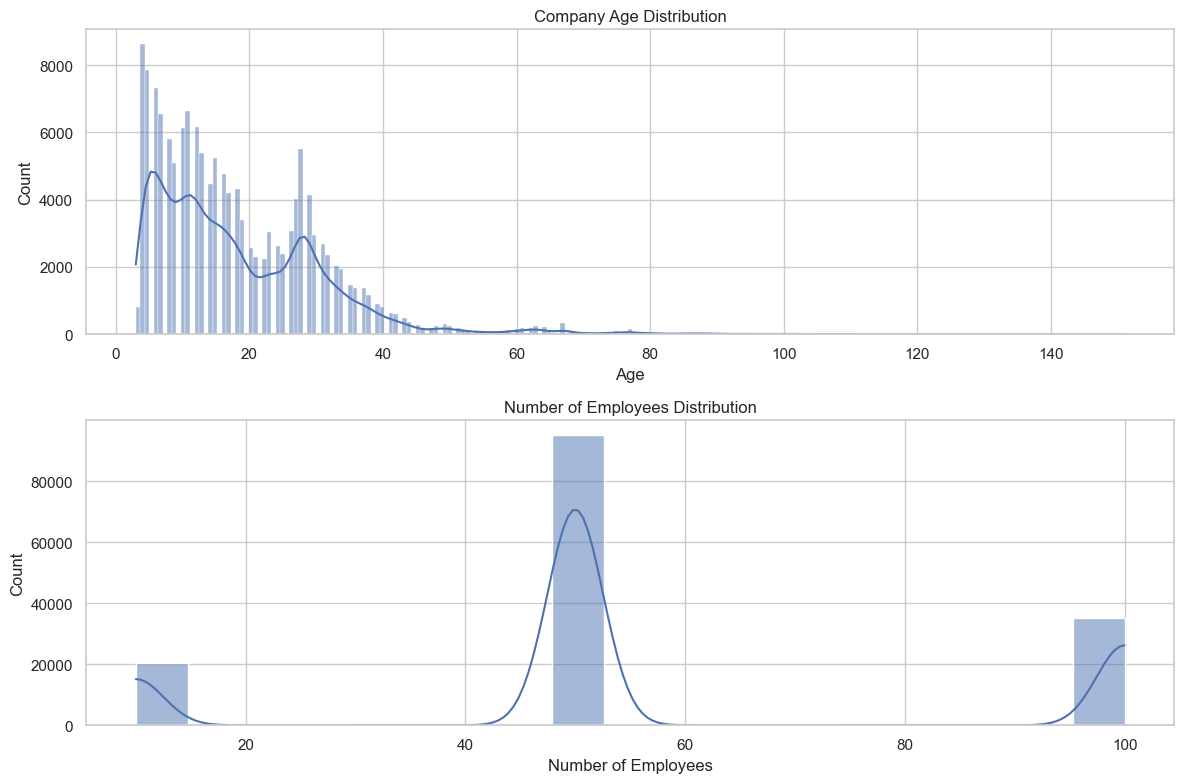

In [434]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.histplot(df_dupfree['COMPANY_AGE'], kde=True, ax=axes[0])
axes[0].set_title('Company Age Distribution')
axes[0].set_xlabel('Age')

sns.histplot(df_dupfree['EMPLOYEES'], kde=True, ax=axes[1])
axes[1].set_title('Number of Employees Distribution')
axes[1].set_xlabel('Number of Employees')

plt.tight_layout()

plt.show()


## Extract 'LATEST_YEAR_ANNUAL_RETURN' year

In [435]:
df_dupfree['ANNUAL_RETURN_YEAR'] = df_dupfree['LATEST_YEAR_ANNUAL_RETURN'].str.extract('(\d+)').astype(float)
mode_registration_date = df_dupfree['ANNUAL_RETURN_YEAR'].mode()[0]
df_dupfree['ANNUAL_RETURN_YEAR'].fillna(mode_registration_date, inplace=True)

In [436]:
df_dupfree.tail()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,...,REGISTRAR_OF_COMPANIES,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT,COMPANY_SIZE,REGISTRATION_YEAR,COMPANY_AGE,COMPANY_STATUS_CODE,EMPLOYEES,CAPITAL_RATIO,ANNUAL_RETURN_YEAR
150866,U74997TN2016PTC112556,QUAD42 MEDIA PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,19-09-2016,Tamil Nadu,1000000.0,100000.0,...,ROC CHENNAI,31-03-2019,31-03-2019,Medium,2016,7,0,50.0,0.100000,31.0
150867,U74997TN2018PTC121491,IYERAATHU FOODS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,100000.0,100000.0,...,ROC CHENNAI,UNKNOWN,UNKNOWN,Medium,2018,5,0,50.0,1.000000,31.0
150868,U74997TZ2016PTC027802,POLYGAR FARM SOLUTIONS PRIVATE LIMITED,STOF,Private,Company limited by Shares,Non-govt company,20-07-2016,Tamil Nadu,100000.0,20000.0,...,ROC COIMBATORE,UNKNOWN,UNKNOWN,Small,2016,7,8,10.0,0.200000,31.0
150869,U74997TZ2018PTC030177,PANDIYA AGRI SOLUTIONS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,2500000.0,1500000.0,...,ROC COIMBATORE,31-03-2019,31-03-2019,Large,2018,5,0,100.0,0.600000,31.0
150870,U74997TZ2019PTC032491,NROOT TECHNOLOGIES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,25-07-2019,Tamil Nadu,1500000.0,1100000.0,...,ROC COIMBATORE,UNKNOWN,UNKNOWN,NaN,2019,4,0,50.0,0.733333,31.0


## Random Forest Algorithm

Accuracy: 0.681147867676365
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.59      0.01        80
           2       0.00      0.00      1.00        77
           3       0.04      0.00      0.01       338
           4       0.00      0.00      1.00       164
           5       0.07      0.04      0.05       127
           6       0.00      0.00      1.00       677
           7       0.44      0.00      0.01     12779
           8       0.00      0.20      0.00        35
           9       0.00      0.00      1.00        60
          10       0.05      0.04      0.04        28
          11       0.00      1.00      0.00         0

   micro avg       0.00      0.01      0.00     14365
   macro avg       0.06      0.17      0.37     14365
weighted avg       0.40      0.01      0.07     14365



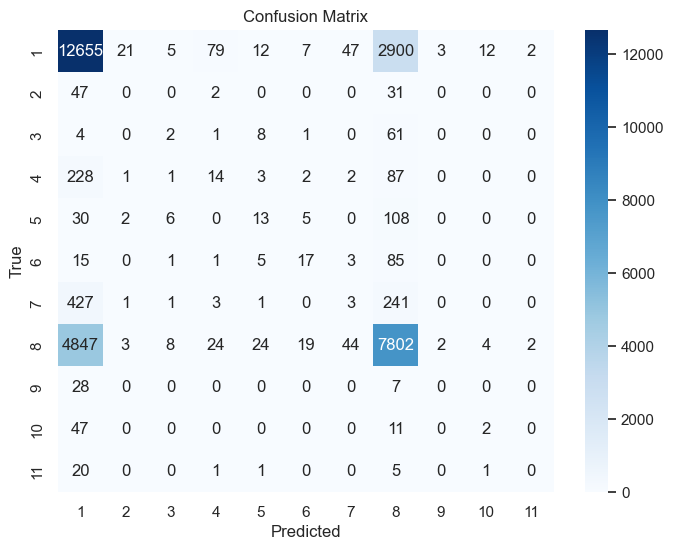

In [437]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df_dupfree = pd.read_csv("Data_Gov_Tamil_Nadu.csv", encoding="ANSI",low_memory=False)

df_dupfree = df_dupfree[['COMPANY_STATUS', 'COMPANY_CLASS', 'COMPANY_CATEGORY',
'AUTHORIZED_CAP',
'PAIDUP_CAPITAL',
'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']]

df_dupfree.dropna(inplace=True)
df_dupfree = df_dupfree.dropna(how="all")

mapping = {
    'Public': 1,
    'Private': 2,
    'Private(One Person Company)': 3,
}

df_dupfree['COMPANY_CLASS'] = df_dupfree['COMPANY_CLASS'].map(mapping)
mappingC = {
    'Company limited by Shares': 1,
    'Company Limited by Guarantee': 2,
    'Unlimited Company': 3,
}
df_dupfree['COMPANY_CATEGORY'] = df_dupfree['COMPANY_CATEGORY'].map(mappingC)

mappingS = {
    'ACTV': 1,
    'ULQD': 2,
    'LIQD': 3,
    'AMAL': 4, 
    'DISD': 5, 
    'NAEF': 6, 
    'UPSO': 7, 
    'STOF': 8,
    'D455': 9, 
    'CLLP': 10, 
    'CLLD': 11,
    
}
df_dupfree['COMPANY_STATUS'] = df_dupfree['COMPANY_STATUS'].map(mappingS)

label_encoders = {}
categorical_columns = ['COMPANY_CLASS', 'COMPANY_CATEGORY','PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']
for column in categorical_columns: label_encoders[column] = LabelEncoder()
df_dupfree[column] = label_encoders[column].fit_transform(df_dupfree[column])
label_encoder_y = LabelEncoder()
df_dupfree['COMPANY_STATUS'] = label_encoder_y.fit_transform(df_dupfree['COMPANY_STATUS'])

X = df_dupfree.drop('COMPANY_STATUS', axis=1)
y = df_dupfree['COMPANY_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_decoded = label_encoder_y.inverse_transform(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

class_labels = label_encoder_y.classes_

y_pred_decoded = [reverse_mapping[label] for label in y_pred]

report = classification_report(y_test, y_pred_decoded, labels=class_labels, zero_division=1)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=label_encoder_y.classes_,yticklabels=label_encoder_y.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
